# Importação dos dados




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URLs dos datasets
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lista para armazenar os dataframes temporários
dfs = list()

# Loop para carregar e identificar cada loja
for i, url in enumerate(urls):
    df_temp = pd.read_csv(url)
    df_temp['Nome'] = f'Loja {i+1}' # Adiciona coluna identificadora
    dfs.append(df_temp)

# Concatena tudo num único DataFrame
df = pd.concat(dfs, ignore_index=True)

df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Nome
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [2]:
# Agrupamos por 'Nome', somamos o 'Preço', a média dos fretes e das avaliações
analise_financeira = df.groupby('Nome').agg(
    Faturamento=('Preço', 'sum'),
    Frete_Medio=('Frete', 'mean'),
    Avaliacao_Media=('Avaliação da compra', 'mean')
).reset_index()

analise_financeira.head()

,Nome,Faturamento,Frete_Medio,Avaliacao_Media
0,Loja 1,1534509.12,34.691805,3.976685
1,Loja 2,1488459.06,33.621941,4.037304
2,Loja 3,1464025.03,33.074464,4.048326
3,Loja 4,1384497.58,31.278997,3.995759


#1. Análise do faturamento



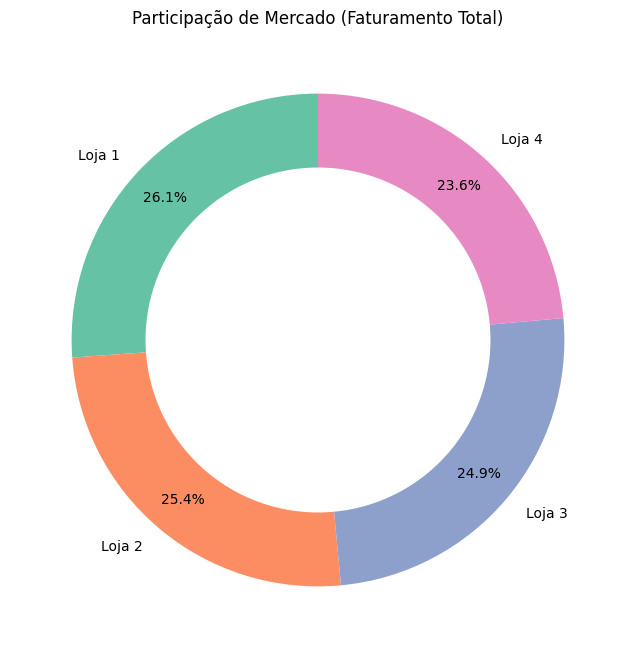

In [3]:
# Cria um gráfico de rosca que compara o faturamento de cada loja em relação ao faturamento de todas as lojas
plt.figure(figsize=(8, 8))
plt.pie(analise_financeira['Faturamento'], labels=analise_financeira['Nome'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette('Set2'))
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Participação de Mercado (Faturamento Total)')
plt.show()

# 2. Vendas por Categoria

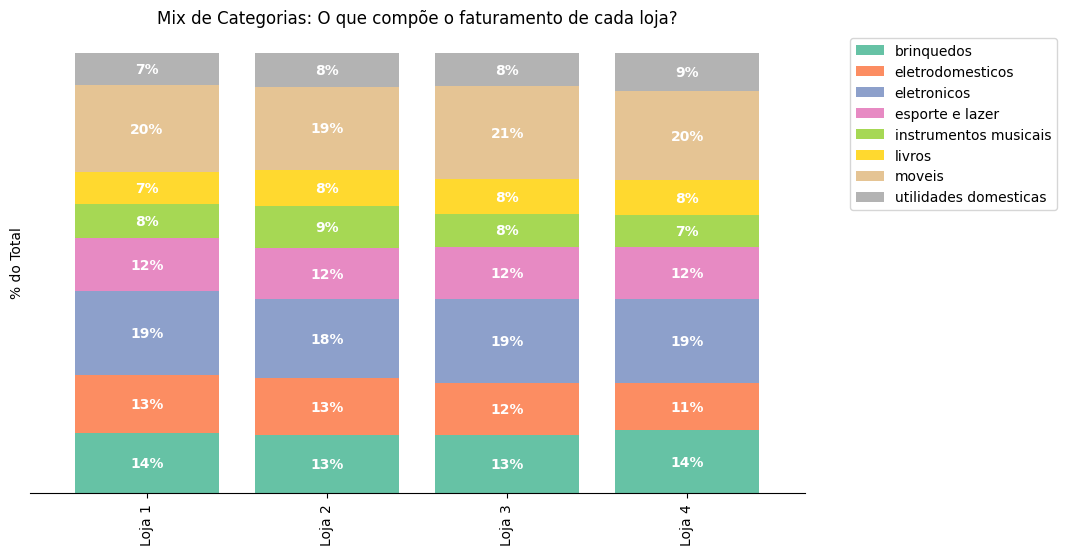

In [4]:
# Cria um gráfico de barras com a porcentagem de cada categoria em relação as vendas totais de cada loja
mix_produtos = pd.crosstab(df['Nome'], df['Categoria do Produto'], normalize='index') * 100
ax = mix_produtos.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', width=0.8)
sns.despine(left=True)
plt.title('Mix de Categorias: O que compõe o faturamento de cada loja?')
plt.ylabel('% do Total')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([])
for c in ax.containers:
    labels = [f'{v.get_height():.0f}%' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white', weight='bold')
plt.show()

# 3. Média de Avaliação das Lojas


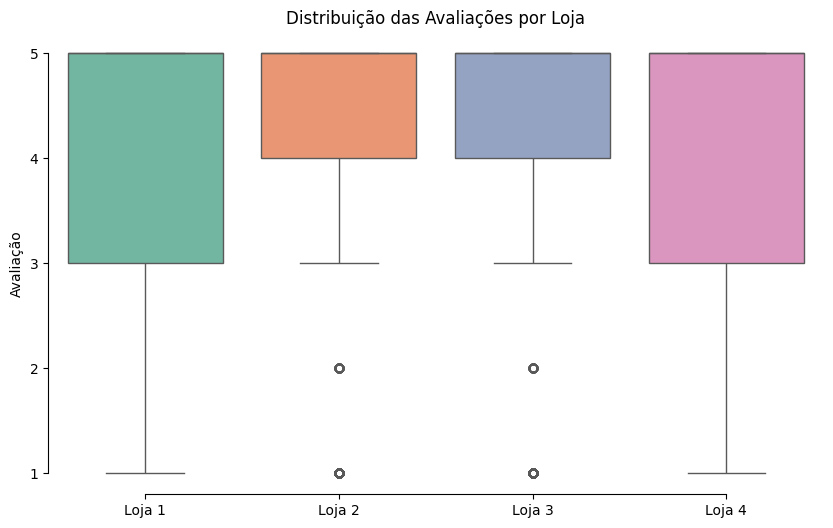

In [5]:
# Cria quatro box plots de distribuição de avaliações para cada loja
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nome', y='Avaliação da compra', data=df, palette='Set2', hue='Nome', legend=False)
sns.despine(trim=True)
plt.xlabel('')
plt.ylabel('Avaliação')
plt.yticks([1, 2, 3, 4, 5])
plt.title('Distribuição das Avaliações por Loja')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [6]:
def analisar_performance_produtos(df_geral):
    # 1. Agrupa por Loja e Produto e conta a frequência (vendas)
    vendas_por_produto = df_geral.groupby(['Nome', 'Produto']).size().reset_index(name='Qtd_Vendas')

    # 2. Encontrar os índices dos Máximos e Mínimos por loja
    idx_max = vendas_por_produto.groupby('Nome')['Qtd_Vendas'].idxmax()
    idx_min = vendas_por_produto.groupby('Nome')['Qtd_Vendas'].idxmin()

    # 3. Selecionar as linhas correspondentes
    top_produtos = vendas_por_produto.loc[idx_max]
    piores_produtos = vendas_por_produto.loc[idx_min]

    print("--- PRODUTO MAIS VENDIDO POR LOJA ---")
    for _, row in top_produtos.iterrows():
        imprimir_detalhes(df_geral, row, "Mais Vendido")

    print("--- PRODUTO MENOS VENDIDO POR LOJA ---")
    for _, row in piores_produtos.iterrows():
        imprimir_detalhes(df_geral, row, "Menos Vendido")

def imprimir_detalhes(df_total, linha_resumo, tipo):
    loja = linha_resumo['Nome']
    produto = linha_resumo['Produto']
    qtd = linha_resumo['Qtd_Vendas']

    # Calculamos o preço médio
    filtro = (df_total['Nome'] == loja) & (df_total['Produto'] == produto)
    preco_medio = df_total.loc[filtro, 'Preço'].mean()

    # Formatação com vírgula
    preco_formatado = f"R$ {preco_medio:.2f}".replace('.', ',')

    print(f"{loja}")
    print(f"Produto: {produto}")
    print(f"Quantidade: {qtd} vendas")
    print(f"Preço Médio: {preco_formatado}\n")

# Chamando a função
analisar_performance_produtos(df)

--- PRODUTO MAIS VENDIDO POR LOJA ---
Loja 1
Produto: Guarda roupas
Quantidade: 60 vendas
Preço Médio: R$ 654,71

Loja 2
Produto: Iniciando em programação
Quantidade: 65 vendas
Preço Médio: R$ 64,15

Loja 3
Produto: Kit banquetas
Quantidade: 57 vendas
Preço Médio: R$ 390,63

Loja 4
Produto: Cama box
Quantidade: 62 vendas
Preço Médio: R$ 708,53

--- PRODUTO MENOS VENDIDO POR LOJA ---
Loja 1
Produto: Celular ABXY
Quantidade: 33 vendas
Preço Médio: R$ 1319,23

Loja 2
Produto: Jogo de tabuleiro
Quantidade: 32 vendas
Preço Médio: R$ 242,17

Loja 3
Produto: Blocos de montar
Quantidade: 35 vendas
Preço Médio: R$ 47,14

Loja 4
Produto: Guitarra
Quantidade: 33 vendas
Preço Médio: R$ 1043,35



# 5. Frete Médio por Loja

In [7]:
# Imprime o preço médio do frete de cada loja
for _, row in analise_financeira.iterrows():
    loja = row['Nome']
    frete_medio = row['Frete_Medio']
    print(f"{loja}: R$ {frete_medio:.2f}".replace('.', ','))

Loja 1: R$ 34,69
Loja 2: R$ 33,62
Loja 3: R$ 33,07
Loja 4: R$ 31,28


# Relatório

    Introdução

A análise do desempenho das quatro lojas da Alura Store foi baseada nos dados fornecidos por cada unidade. O objetivo principal desta análise é comparar as lojas através de métricas bem definidas, gerando insights baseados em dados que ajudem o Senhor João a tomar a decisão mais assertiva sobre qual filial vender. As principais métricas avaliadas foram o faturamento total, a média de avaliações dos clientes, o frete médio, o desempenho de produtos e as categorias mais vendidas.

    Desenvolvimento

Em primeira instância, ao analisarmos as **Lojas 2 e 3,** notamos que ambas apresentam uma operação muito saudável. Elas possuem faturamentos altos, as melhores médias de avaliações (com a Loja 3 atingindo a nota máxima de 4,04) e fretes com preços razoáveis. Como o faturamento e a satisfação do cliente são pilares fundamentais para a saúde do negócio, a recomendação é que estas duas lojas sejam mantidas em posse do Sr. João sem sombra de dúvidas.

A decisão crítica concentra-se nas Lojas 1 e 4, que apresentam pontos de atenção graves:

*   **A Loja 1** possui o maior faturamento da rede, contudo, sofre com a **pior média de avaliação** dos clientes (3,97) e o **frete médio mais caro** (R\$34,69). Além disso, ela tem um forte foco em eletrodomésticos, que são produtos de ticket médio mais alto, o que explica o faturamento elevado apesar da insatisfação dos clientes.

*   **A Loja 4,** em contrapartida, apresenta o **menor faturamento** entre todas as filiais (R\$1.384.497,58). Apesar de possuir o frete mais barato(R\$31,28) e uma avaliação ligeiramente superior à da Loja 1, o seu volume de dinheiro gerado é muito inferior, mesmo o seu produto mais vendido (Cama box) tendo um preço médio alto (R\$708,53).
<br>

    Conclusão

Levando em consideração que as Lojas 2 e 3 estão seguras, a comparação final se dá entre manter a Loja 1 ou a Loja 4. **Recomendo fortemente que a Loja 4 seja vendida.** O principal motivo para essa decisão é o seu faturamento, que destoa negativamente das demais filiais. A Loja 1, mesmo apresentando ineficiência logística (frete caro) e precisando de melhorias no atendimento (avaliação baixa), ainda é a que mais traz dinheiro para o caixa da empresa. A diferença de avaliação entre a Loja 1 e a Loja 4 não é significativa o suficiente para justificar a perda do alto faturamento que a Loja 1 proporciona. Portanto, vender a Loja 4 representa o menor impacto financeiro para a rede do Sr. João.

